<a href="https://colab.research.google.com/github/janusis/AIFFEL_Exploration/blob/main/Quest02/%5B%ED%80%98%EC%8A%A4%ED%8A%B8_2%5D_%EA%B1%B0%EB%B6%81%EC%9D%B4_%EB%AF%B8%EB%A1%9C%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[파이썬] 퀘스트: 거북이 미로찾기

난이도: ★★★☆☆

장르: ColabTurtlePlus, 함수, 조건문 활용

---

다음은 ColabTurtle을 사용하여 미로를 찾는 문제.
조건을 확인하여 거북이가 미로를 헤매지 않도록 출구를 찾아주도록 하자.

조건 :
미로는 5x5의 2차원 리스트로 주어진다.
시작 위치는 (0,0)이고 목적지는 (4,4)이다.
터틀은 상하좌우로 움직일 수 있다.
미로 내에서 갈 수 있는 길은 0으로 표시되어 있다.
터틀이 이미 지나간 길은 2로 표시해야한다.
거북이가 미로를 찾아 나가면 "미로를 찾았습니다.",
미로를 찾을 수 없으면 "미로를 찾을 수 없습니다."가 나올 수 있도록 만들어보자!

- 주석으로 구현 내용이 써있는 부분을 코드로 채워주세요!!
- 코드를 해석해주세요 부분은 코드에 대한 설명을 주석으로 써주세요!!

결과물은 다음과 같아야 합니다 :)

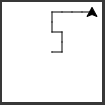


[회고]
- 배운점: 기존 코드를 읽고 문제 수행을 위해 코드를 짜고, 어려운 부분은 검색을 통해 채워가는 것을 배웠습니다.
- 아쉬운점: 아직 코딩 실력이 좋지 않아서 바로 문제 해결은 어려웠고, 검색이나 외부의 도움을 많이 받았습니다.
- 느낀점: 아직 실력이 너무 부족해서 같이 하는 사람에게 폐가 되지는 않을까 걱정이 되네요


In [29]:
# !pip install ColabTurtlePlus # ColabTurtle 라이브러리 설치
from ColabTurtlePlus.Turtle import * # ColabTurtle 라이브러리에서 Turtle 클래스를 import


# 미로 데이터
maze = [
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# maze = [
#     [0, 1, 1, 1, 1],
#     [0, 0, 0, 1, 1],
#     [1, 1, 0, 1, 1],
#     [1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1]
# ]

# 시작 위치와 목적지 위치
start_x, start_y = 0, 0
end_x, end_y = 4, 4

# 터틀 초기 설정
window = (100, 100)
initializeTurtle(window, 'logo')
speed(1)

# 미로 찾기 알고리즘
def solve_maze(x, y):
    # 목적지에 도착한 경우(조건문)
    if x == end_x and y == end_y :
        print("미로를 찾았습니다.") # "미로를 찾았습니다" 라는 문장을 출력
        return True  # 출구에 도달하면 성공 True를 반환한다.


    # 현재 위치에서 갈 수 있는 방향 탐색
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy

        # 미로 범위(0,0 ~ 4,4) 내에 있고, 갈 수 있는 길인 경우
        if 0 <= nx < 5 and 0 <= ny < 5 and maze[nx][ny] == 0:
            # 갔던 길 표시
            maze[nx][ny] = 2

            # 다음 위치로 이동
            pendown()
            goto(nx*10, ny*10)  # 거북이 다음 위치로 이동
            penup()

            # 재귀적으로 다음 위치로 이동하여 미로를 탐색
            if solve_maze(nx, ny):
                return True
            else:
                # 다시 이전으로 돌아가기
                pendown()
                goto(x * 10, y * 10)  # 원래 위치로 되돌아가기
                penup()
                maze[nx][ny] = 0  # 표시된 길 0으로 지우기

    # 길을 찾지 못한 경우
    # "길을 찾을 수 없습니다"를 출력하고
    # False를 리턴
    print("길을 찾을 수 없습니다")
    return False


# 시작 위치에서 미로 찾기 시작
goto(start_x, start_y)
solve_maze(start_x, start_y)

import pprint
pprint.pprint(maze)

미로를 찾았습니다.
[[0, 1, 2, 2, 2],
 [2, 2, 2, 1, 2],
 [0, 1, 1, 0, 2],
 [0, 0, 1, 1, 2],
 [0, 0, 0, 0, 2]]


In [3]:
!pip install ColabTurtlePlus

### 일부 함수에 대한 내용 확인

* pendown:

pendown() 명령은 터틀의 펜을 내려놓는 역할을 합니다. 즉, 펜을 종이에 대고 그림을 그릴 수 있도록 활성화시킵니다.
이후에 터틀이 이동하면 그림을 그리며 경로를 남깁니다.
pendown()을 호출하면 그 다음 터틀의 이동에 따라 선이 그려집니다.

* goto:

goto(x, y) 명령은 터틀을 지정한 좌표 (x, y)로 이동시키는 역할을 합니다.
(x, y) 좌표는 화면의 절대 위치를 나타냅니다. x는 가로 방향 위치, y는 세로 방향 위치를 의미합니다.
터틀은 이동하면서 경로를 남기며, 펜이 내려간 상태에서 이동하면 선이 그려집니다.

* penup:

penup() 명령은 터틀의 펜을 들어올리는 역할을 합니다. 즉, 펜을 종이에서 떼어서 그림을 그리지 않도록 비활성화시킵니다.
이후에 터틀이 이동하더라도 선을 그리지 않습니다.
pendown()과 함께 사용하여 특정 부분만 그림을 그리도록 제어할 수 있습니다.

---

###원래 위치로 돌아가는 코드가 goto(x * 10, y * 10) 인 이유는?

goto(x * 10, y * 10) 코드는 터틀을 원래 위치로 되돌리기 위한 코드입니다. goto(x, y) 대신 goto(x * 10, y * 10)를 사용한 이유는 터틀 그래픽의 좌표 시스템과 미로를 그릴 때 사용한 좌표 시스템이 서로 다르기 때문입니다.

미로를 그릴 때는 *10을 곱하여 터틀이 그릴 좌표를 설정했습니다. 따라서 터틀이 미로 내에서 이동하면서 그린 선들의 좌표는 모두 *10을 곱한 형태로 저장되었습니다.

그래서 다시 원래 위치로 돌아가려면 x와 y 좌표를 그대로 사용하는 것이 아니라, *10을 곱한 형태로 되돌려야 원래 위치로 정확하게 이동할 수 있습니다.

---

###좌표 이동에 대한 내용
for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy

주어진 코드는 미로를 탐색하기 위한 방향 설정을 위한 부분입니다. 이 코드는 (0, 1), (1, 0), (0, -1), (-1, 0) 이렇게 네 가지 방향으로 이동할 수 있는 경우를 나타냅니다. 이해를 돕기 위해 미로를 상상하고 아래 설명을 읽어보세요:

(0, 1)은 현재 위치에서 위쪽으로 이동하는 것을 나타냅니다. 여기서 dx는 x 방향의 변화량을 의미하며 0이므로 x 방향은 그대로 유지하고, dy는 y 방향의 변화량을 의미하며 1이므로 y 방향으로 1만큼 이동합니다. 따라서 이동하면 현재 위치에서 위쪽으로 한 칸 이동한 위치 (nx, ny)가 계산됩니다.

(1, 0)은 현재 위치에서 오른쪽으로 이동하는 것을 나타냅니다. 이번에는 dx가 1이므로 x 방향으로 1만큼 이동하고, dy가 0이므로 y 방향은 그대로 유지됩니다. 따라서 이동하면 현재 위치에서 오른쪽으로 한 칸 이동한 위치 (nx, ny)가 계산됩니다.

(0, -1)은 현재 위치에서 아래쪽으로 이동하는 것을 나타냅니다. dx는 0이므로 x 방향은 그대로 유지하고, dy는 -1이므로 y 방향으로 1만큼 아래쪽으로 이동합니다. 따라서 이동하면 현재 위치에서 아래쪽으로 한 칸 이동한 위치 (nx, ny)가 계산됩니다.

(-1, 0)은 현재 위치에서 왼쪽으로 이동하는 것을 나타냅니다. dx가 -1이므로 x 방향으로 1만큼 왼쪽으로 이동하고, dy는 0이므로 y 방향은 그대로 유지됩니다. 따라서 이동하면 현재 위치에서 왼쪽으로 한 칸 이동한 위치 (nx, ny)가 계산됩니다.

이러한 방향 설정은 미로를 탐색할 때 현재 위치에서 상하좌우 네 방향으로 이동하며, 가능한 경로를 탐색하는 데 사용됩니다. 이 코드를 이용하면 미로 내에서 다음으로 이동할 위치를 쉽게 계산할 수 있으며, 이동 방향을 변경하면서 미로를 탐색할 수 있습니다.

---

###궁금증

    print("길을 찾을 수 없습니다")
    return False

의 들여쓰기에 따라 결과가 달라지던데 왜 그럴까?


들여쓰기가 for 루프 외부에 있는 경우:

 print("길을 찾을 수 없습니다")와 return False는 for 루프와 독립적으로 실행됩니다. 즉, 한 번의 실패로 인해 return False가 호출되면 더 이상 다른 방향으로 미로를 탐색하지 않고 함수를 종료하게 됩니다.